In [ ]:
!pip install split-folders

`!` runs a command in a command terminal

In [ ]:
import splitfolders

Mount Drive and copy the path to "banana_data" folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
splitfolders.ratio(input="/content/drive/MyDrive/Data Science/UpLevel/Project Banana Classifier/banana_data",
                   output="/content/drive/MyDrive/Data Science/UpLevel/Project Banana Classifier/output",
                   seed=2021,
                   # train, val, test
                   ratio=(0.7, 0.15, 0.15))

Copying files: 450 files [02:42,  2.78 files/s]


In [ ]:
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import mobilenet_v2, resnet50, vgg16 # models and stuff
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model # wraps pretrained model and our own stuff later on
from keras.optimizers import Adam

In [ ]:
# trained on imagenet dataset
# include_top = False = trim off the top
base_model = MobileNetV2(weights='imagenet', include_top=False) # import the model + remove the last layers

# get base model's layers
x = base_model.output

# add on our own layers
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) #512 units

# dropout layers randomly remove half of the neurons to prevent overfitting
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# final layer with softmax activation - predicting 3 classes -> 3 units
preds = Dense(3, activation='softmax')(x) # softmax returns list of prob

In [ ]:
# during each training update weights 8 images at a time
batch_size = 8

In [ ]:
# augmentation process
# image transformation to create new images -> increases number of data
train_datagen = ImageDataGenerator(rescale=1./255, # normalised between 0 & 1
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# data from directory to model in batches with transformation
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/UpLevel/Project Banana Classifier/output/train',
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 315 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/UpLevel/Project Banana Classifier/output/val',
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 66 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/UpLevel/Project Banana Classifier/output/test',                                             
                                                    shuffle=False)

Found 68 images belonging to 3 classes.


In [ ]:
# set up model
model = Model(inputs=base_model.input, outputs=preds)

In [ ]:
# compile model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train model
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // batch_size, # number of samples divided by batch size
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // batch_size,
                    epochs = 20)

# batch_size used since don't put all images in 1 round of training (should be multiple rounds)
# validation checks if overfitting (cannot generalise)
# loss & val_loss should be similar (+- 0.1)

Epoch 1/20
39/39 [==============================] - 22s 331ms/step - loss: 0.9876 - accuracy: 0.6128 - val_loss: 12.8769 - val_accuracy: 0.3438
Epoch 2/20
39/39 [==============================] - 10s 252ms/step - loss: 0.6917 - accuracy: 0.7827 - val_loss: 2.6346 - val_accuracy: 0.5781
Epoch 3/20
39/39 [==============================] - 10s 251ms/step - loss: 0.5752 - accuracy: 0.8462 - val_loss: 7.2617 - val_accuracy: 0.3750
Epoch 4/20
39/39 [==============================] - 10s 244ms/step - loss: 0.7825 - accuracy: 0.8300 - val_loss: 7.1116 - val_accuracy: 0.5312
Epoch 5/20
39/39 [==============================] - 10s 250ms/step - loss: 0.4909 - accuracy: 0.8336 - val_loss: 14.0424 - val_accuracy: 0.4219
Epoch 6/20
39/39 [==============================] - 10s 251ms/step - loss: 0.6089 - accuracy: 0.8289 - val_loss: 5.6385 - val_accuracy: 0.6250
Epoch 7/20
39/39 [==============================] - 10s 253ms/step - loss: 0.4854 - accuracy: 0.8125 - val_loss: 6.9115 - val_accuracy: 0.43

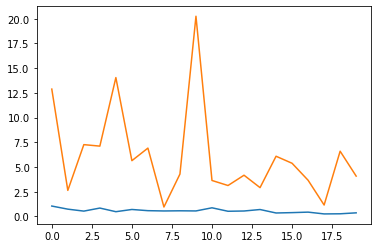

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

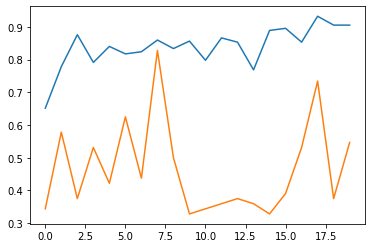

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
test_generator.classes # in Colab, classes are arranged in alphabetical order: green, overripe, ripe
# thus don't shuffle

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
# to assess performance
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = model.predict(test_generator)
predictions # returns prob since softmax
# [ class 0, class 1, class 2]

array([[9.99995828e-01, 5.37423750e-09, 4.20799552e-06],
       [9.99992490e-01, 1.13253247e-08, 7.53605673e-06],
       [4.75638990e-06, 9.43810647e-08, 9.99995112e-01],
       [9.99928594e-01, 1.82851394e-07, 7.11629109e-05],
       [9.96435642e-01, 3.29354443e-05, 3.53148859e-03],
       [9.99964118e-01, 1.26948564e-07, 3.57791396e-05],
       [9.99966383e-01, 4.81608282e-08, 3.36273042e-05],
       [9.98897552e-01, 2.94061647e-06, 1.09946448e-03],
       [9.99996662e-01, 3.50406948e-09, 3.35015193e-06],
       [9.99995828e-01, 4.95107333e-09, 4.16853663e-06],
       [9.99983311e-01, 4.38546053e-08, 1.66707578e-05],
       [9.99994278e-01, 8.37025649e-09, 5.66971994e-06],
       [9.99995351e-01, 5.93214722e-09, 4.69825682e-06],
       [9.97153759e-01, 2.40155950e-05, 2.82225385e-03],
       [9.91935730e-01, 8.88734721e-05, 7.97530077e-03],
       [9.99996185e-01, 4.26544045e-09, 3.76873027e-06],
       [9.99988914e-01, 2.66969984e-08, 1.10944584e-05],
       [9.97510195e-01, 1.13807

In [ ]:
import numpy as np
# get the index with the highest value of list
single_pred = np.argmax(predictions, axis=1)
single_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2])

In [ ]:
# evalation
confusion_matrix(test_generator.classes, single_pred)

array([[20,  0,  2],
       [20,  0,  3],
       [ 7,  0, 16]])

Confusion Matrix

|        |          | green | overripe | ripe |
|--------|----------| ----- |:--------:| ----:|
|        | green    |       |          |      |
| Actual | overripe |       |          |      |
|        | ripe     |       |          |      |

Try VGG16

In [ ]:
# trained on imagenet dataset
# include_top = False = trim off the top
base_model = VGG16(weights='imagenet', include_top=False) # import the model + remove the last layers

# get base model's layers
x = base_model.output

# add on our own layers
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) #512 units

# dropout layers randomly remove half of the neurons to prevent overfitting
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# final layer with softmax activation - predicting 3 classes -> 3 units
preds = Dense(3, activation='softmax')(x) # softmax returns list of prob

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# set up model
model = Model(inputs=base_model.input, outputs=preds)

In [ ]:
# compile model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# train model
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // batch_size, # number of samples divided by batch size
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // batch_size,
                    epochs = 20)

# batch_size used since don't put all images in 1 round of training (should be multiple rounds)
# validation checks if overfitting (cannot generalise)
# loss & val_loss should be similar (+- 0.1)

Epoch 1/20
39/39 [==============================] - 19s 344ms/step - loss: 1.5623 - accuracy: 0.3158 - val_loss: 1.1076 - val_accuracy: 0.3281
Epoch 2/20
39/39 [==============================] - 10s 266ms/step - loss: 1.1531 - accuracy: 0.3305 - val_loss: 1.0977 - val_accuracy: 0.3438
Epoch 3/20
39/39 [==============================] - 10s 267ms/step - loss: 1.0981 - accuracy: 0.3622 - val_loss: 1.0984 - val_accuracy: 0.3281
Epoch 4/20
39/39 [==============================] - 11s 267ms/step - loss: 1.1075 - accuracy: 0.3334 - val_loss: 1.0977 - val_accuracy: 0.3438
Epoch 5/20
39/39 [==============================] - 11s 274ms/step - loss: 1.1122 - accuracy: 0.2884 - val_loss: 1.1028 - val_accuracy: 0.3125
Epoch 6/20
39/39 [==============================] - 11s 271ms/step - loss: 1.1137 - accuracy: 0.3101 - val_loss: 1.0991 - val_accuracy: 0.3281
Epoch 7/20
39/39 [==============================] - 10s 265ms/step - loss: 1.1034 - accuracy: 0.3229 - val_loss: 1.0990 - val_accuracy: 0.3281

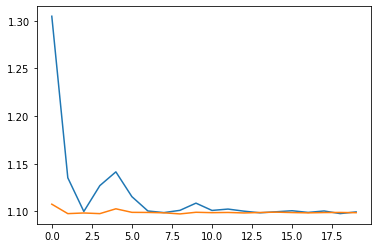

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

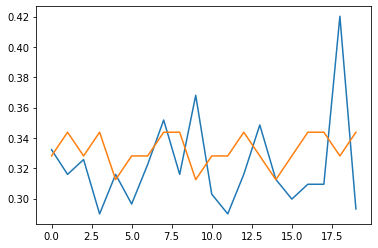

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
predictions = model.predict(test_generator)
predictions # returns prob since softmax
# [ class 0, class 1, class 2]

array([[0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.33020532, 0.33566824, 0.3341264 ],
       [0.

In [ ]:
import numpy as np
# get the index with the highest value of list
single_pred = np.argmax(predictions, axis=1)
single_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# evalation
confusion_matrix(test_generator.classes, single_pred)

array([[ 0, 22,  0],
       [ 0, 23,  0],
       [ 0, 23,  0]])